In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Assign artificial data##
N = 100
Y1 = np.ones( int(N/2) )
Y2 = np.ones( int(N/2) )*(-1)
Y = np.append(Y1,Y2)
print("Y=")
print(Y)
##5(X1)+8(X2)+1=0 -> X2= -5/8(X1)-1/8##
X1 = np.random.rand(N)*20-10
print("X1=")
print(X1)
X2 = ( X1*(-5)/8 )-(1/8)
ran = np.random.rand(N)*10
X2[Y==1] = X2[Y==1] + ran[Y==1]
X2[Y==-1] = X2[Y==-1] - ran[Y==-1]
print("X2=")
print(X2)

Y=
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
X1=
[ 6.28928457 -4.471715   -2.12364886  0.30702226  5.12173268 -5.06835357
  3.82362038  0.29463971  7.34714846 -8.88646881  7.89877573 -6.43006793
  7.2426462   6.97449434 -4.5092011   7.61413608  8.48375247  8.37532371
  5.42658648 -3.74873265  6.15836703 -8.96813897 -4.97696345 -0.35042325
 -9.75533919  7.11568082 -7.02145973  6.99487807 -4.10347429  2.86021214
 -3.59124209 -4.04128356  1.34709508  7.73821178 -3.48875419  1.6264049
  0.52541281 -8.40723653  2.82133204  4.25386352 -3.88003784  0.82689181
 -1.20682454  0.16188358 -6.21480278  1.62363697  9.42055315 -6.12873133
  4

In [3]:
##ploting sub_function##
def plot_out(w0,w1,w2):
    ##plot data##
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y==1],X2[Y==1], s=50, c='b', marker="o", label='yn=1')
    plt.scatter(X1[Y==-1],X2[Y==-1], s=50, c='r', marker="x", label='yn=-1')
    
    ##plot f(x) line##
    X2_1_fx,X2_2_fx = ( (-13)*(-5)/8 )-(1/8),( 13*(-5)/8 )-(1/8)
    plt.plot([-13,13],[X2_1_fx,X2_2_fx],'g--', label='f(x)')
    
    ##plot g(x) line & background##
    o_fill_x, o_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    x_fill_x, x_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    if w2!=0:
        X2_1_fill,X2_2_fill= (-w1*(-15)/w2)-(w0/w2), (-w1*15/w2)-(w0/w2)
        o_fill_x, o_fill_y = [-15,15,15,-15], [X2_1_fill,X2_2_fill,15,15]
        x_fill_x, x_fill_y = [-15,15,15,-15], [X2_1_fill,X2_2_fill,-15,-15]
    plt.fill( o_fill_x, o_fill_y, 'b', alpha = 0.15)
    plt.fill( x_fill_x, x_fill_y, 'r', alpha = 0.15)
    plt.plot([-15,15],[X2_1_fill,X2_2_fill],alpha = 0.4, label='g(x)')
    
    ##fiture settings##
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_title("[w0, w1, w2] = [ "+str(w0)+", "+ str(w1)+", "+ str(w2)+" ]" )
    plt.xlabel("X1")
    plt.ylabel("X2")
    fig.set_size_inches(5,5)
    plt.legend(loc='upper right')

    plt.show()

In [23]:
##perceptron sub_funciton##
def run_perceptron(w0,w1,w2,ite):
    ##check if there is any error
    err = np.where( (Y*(X1*w1+X2*w2+w0))<0 )
    err = err[0]
    if len(err)!=0:
        print(">>error at index=")
        print(err)
        w0 = w0 + Y[err[0]]
        w1 = w1 + Y[err[0]] * X1[err[0]]
        w2 = w2 + Y[err[0]] * X2[err[0]]
        ite=ite+1
        print(">>correcting with PLA...")
    else:
        print(">>no error")
        
    return [w0,w1,w2,ite]

>>iteration = 0. Perceptron Learning Algorithm starts...


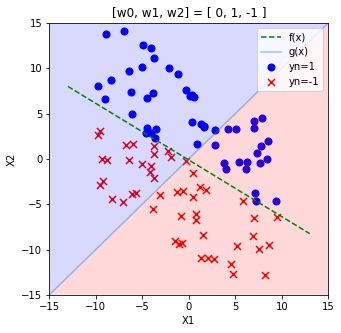

In [27]:
##plot default##
w0,w1,w2 = 0,1,-1
print(">>iteration = 0. Perceptron Learning Algorithm starts...")
plot_out(w0,w1,w2)

>>iteration=1
>>error at index=
[ 1  2  3  5  7  9 11 14 19 21 22 23 24 26 28 30 31 32 34 35 36 37 38 40
 41 42 43 44 45 47 49 53 55 56 57 61 64 66 67 70 71 72 74 75 76 77 78 79
 80 81 82 83 89 90 92 93 94 98 99]
>>correcting with PLA...

>>iteration=2
>>error at index=
[ 0  4  6  8 10 12 13 15 16 17 18 20 25 27 29 33 38 39 46 48 50 51 52 54
 58 59 60 62 63 65 68 69 73 76 78 84 85 86 87 88 91 95 96 97]
>>correcting with PLA...

>>iteration=3
>>error at index=
[ 1 21 24 30 31 34 37 44 47 49 53 65 74 75 79 80 83 93 94]
>>correcting with PLA...

>>iteration=4
>>error at index=
[ 0  6  8 12 15 16 17 18 20 25 33 46 48 52 54 58 59 60 62 63 65 68 69 73
 84 85 86 88 96 97]
>>correcting with PLA...

>>iteration=5
>>error at index=
[ 1 21 24 30 31 47 49 65 80 83 94]
>>correcting with PLA...

>>iteration=6
>>error at index=
[12 20 25 46 48 52 54 58 60 65 68 69 84 85 88 96 97]
>>correcting with PLA...

>>iteration=7
>>error at index=
[ 1  9 11 14 21 24 30 31 34 37 44 47 49 53 57 65 67 74 75 79 80 

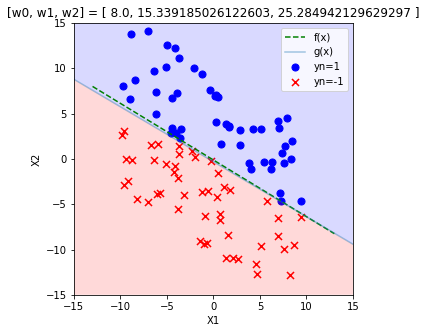


Perceptron Learning Algorithm done!


In [28]:
##run perceptron##
for i in range(0,1000,1):
    print(">>iteration="+ str(i+1) )
    ret = run_perceptron(w0,w1,w2,i+1)
    w0,w1,w2 = ret[0], ret[1], ret[2]
    print("")
    if (i+1)==ret[3]:
        break
    
print(">>result after PLA =")
plot_out(w0,w1,w2)        
print("\nPerceptron Learning Algorithm done!")